In [20]:
#Count-based approach
import pandas as pd

df = pd.read_csv("data/dataframe.csv")
df.head()

X = df.drop("y", axis=1).values
y = df["y"].values

In [21]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#oversampler = RandomOverSampler(random_state=42)
#X_res, y_res = oversampler.fit_resample(X,y)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 42, test_size = 0.33)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", n_estimators = 30)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9084480122324159


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
import joblib

# Define the scoring metric
scorer = make_scorer(f1_score)

model = RandomForestClassifier()

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,20,30,40,50],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3],
              'criterion': ["entropy","gini","log_loss"]
           }

grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring="f1_micro",verbose=10, n_jobs=-1)

# Enable verbose logging using joblib
joblib.parallel_backend('threading')

model_grid = grid.fit(X_train,y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
[CV 1/3; 1/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 3/3; 1/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 2/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 2/3; 2/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 3/3; 2/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 1/3; 3/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30
[CV 2/3; 3/2160] START criterion=entrop

In [15]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score is: 0.8945386064030133


In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.88      0.93      0.91       451
          15       0.91      0.93      0.92       427
          16       0.98      0.97      0.98       454
          21       0.90      0.99      0.94       446
          33       0.90      0.83      0.87       453
          34       0.99      0.98      0.98       420
          39       0.99      0.99      0.99       433
          56       0.89      0.90      0.89       444
          68       0.76      0.83      0.80       438
          95       0.95      0.98      0.96       409
        1000       0.90      0.77      0.83       408
        1001       0.84      0.78      0.81       449

    accuracy                           0.91      5232
   macro avg       0.91      0.91      0.91      5232
weighted avg       0.91      0.91      0.91      5232



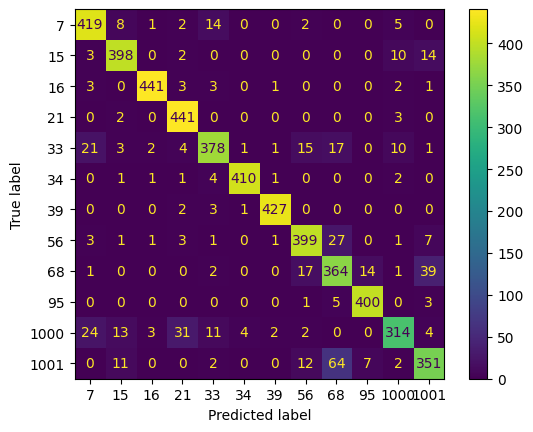

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()